# Dreem slow oscillation prediction 

## Table of contents

0. [Prerequisites](#Software-prerequisites)
1. [Introduction](#Introduction:-what-is-this-challenge-about)
2. [Aim of the challenge](#Aim-of-challenge)
3. [Workflow](#Workflow)
4. [Starting kit](#Simple-Starting-kit)
5. [Evaluation](#Evaluation)
6. [Submission](#Submitting-to-the-online-challenge:-ramp.studio)
7. [More information](#More-information)
8. [Questions](#Questions)

## Software prerequisites

This starting kit requires the following dependencies:

* `numpy`
* `scipy`
* `pandas`
* `scikit-learn`
* `h5py`
* `matplolib`
* `jupyter`
* `ramp-workflow`


## Introduction: what is this challenge about

### Measuring Sleep

The measurment of sleep is usually done in a sleep laboratory. Various electrodes are attached to the head to measure physiological signals. Electrical activity in the brain is measured by electroencephalography (EEG). Muscle activity is recorded using electromyography (EMG), because muscle tone also differs between wakefulness and sleep. Eye movements during sleep are measured using electro-oculography (EOG). Other sensors can be added (pulseoxymeter, airflow etc.) These procedure is called polysomnographie (PSG) and allows to analyse the state of the patient during sleep. It also allows to track sleep related disease such as sleep apnea or restless-leg syndrom.

### Dreem Headband

The [Dreem headband](https://dreem.com/en/) is a device able to measure sleep at home. It is easy to use and more comfortable than a classic PSG. Its aims to help people track and improve their sleep. The Dreem headband uses three kind of sensors: EEG electrodes, accelerometer and pulseoximeter. Hence, it is able to measure brain activity, position, respiration, heartrate and movement all through the night. The device is also able to send sounds using bone conduction. Signals are analyzed online throughout the night and the device is able to perform sound stimulation to enhance deep sleep quality at different steps of the night: falling asleep, deep sleep and awakening. 

#### Normal sleep

Sleep progresses in cycles that involve multiple sleep stages:

* wake
* light sleep (non-REM stage 1 and 2)
* deep sleep (non-REM stage 3)
* REM sleep

Different sleep stages are associated with different physiological functions. The represenation of the sleep stages through the night is called an hypnogram (example shown below) and is built from the physiological signals recorded by PSG and analyzed by window of 30seconds. 


![](https://www.researchgate.net/profile/Seithikurippu_R_Pandi-Perumal/publication/305754675/figure/fig1/AS:391434457894913@1470336655208/A-hypnogram-showing-normal-distribution-of-sleep-stages.png)


#### Deep Sleep

Deep sleep (also called slow wave sleep) occurs mainly in the first hours of sleep. It is associated with memory consolidation, energy restoration, hormone releasing. Electroencephalographic measurement in deep sleep is characterized by slow oscillations: trains of high magnitude and low frequency waves (1-4 Hz).

#### Deep sleep enhancement

Deep Sleep can be enhanced by inducing slow oscillations through various kind of stimulations (auditory, visual, magnetic etc. see this publication). The Dreem headband is able to perform such sound stimulation during deep sleep.



## Aim of challenge
In this challenge, data consists of EEG signals acquired on the Dreem headband in sham condition i.e. without any kind of sound stimulations, 'normal condition'.

In this dataset, we try to predict whether or not a slow oscillation will be followed by another one in sham condition (without any stimulation). This will allow us to:

* Predict normal brain activity
* Know when it’s interesting to stimulate
* Better quantify the impact of an individual stimulation by comparing to what would have occurred without stimulation

The metric used to assess the model predictions is the [sk-learn accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) - which returns the fraction of correctly classified samples.

## The data

### Features

Each sample (row) provides information about previous slow oscillations, the current oscillation, sleep duration details and EEG signal from 10 seconds of recording starting 10 seconds before the end of the current slow oscillation. Data provided consists of a N x 1261 matrix.

Columns:

1. `prev_SOs` - Number of previous slow oscillations
2. `mean_amp` - Mean amplitude of previous slow oscillations
3. `mean_dur` - Mean duration of previous slow oscillations
4. `amp_SO` - Amplitude of the current slow oscillation
5. `dur_SO` - Duration of the current slow oscillation
6. `sleep_stage` - Current Sleep stage
7. `sleep_time` - Time elapsed since the person fell asleep
8. `deepsleep_time` - Time spent in deep sleep so far
9. `lightsleep_time` - Time spent in light sleep so far
10. `remsleep_time` - Time spent in rem sleep so far
11. `wakesleep_time` - Time spent in wake sleep so far

EEG columns:

12-1261. `EEG0` to `EEG1249` - EEG signal for 10 seconds (sampling frequency: 125Hz -> 1250 data points)

### Labels

The prediction is a label in {0, 1, 2}.

0. no slow oscillation is starting in the following second.
1. a slow oscillation of low amplitude started in the following second.
2. a slow oscillation of high amplitude started in the following second

High and low are defined with respect with the mean amplitude of slow oscillations measured on the whole record.

### Import data

* `data_train` - pandas dataframe
* `y_train` - numpy array

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from problem import get_train_data

data_train, y_train = get_train_data()

In [7]:
data_train.head()

,prev_SOs,mean_amp,mean_dur,amp_SO,dur_SO,sleep_stage,sleep_time,deepsleep_time,lightsleep_time,remsleep_time,...,EEG1240,EEG1241,EEG1242,EEG1243,EEG1244,EEG1245,EEG1246,EEG1247,EEG1248,EEG1249
0,258,146,285,191,409,2,14170,1710,3900,900,...,6,8,18,29,35,32,24,14,-2,-21
1,333,155,320,158,461,2,14049,2430,4080,30,...,17,17,17,15,15,14,8,0,-7,-16
2,120,168,352,120,264,3,13791,2130,420,0,...,22,18,15,11,10,7,0,-13,-29,-43
3,312,160,278,176,445,3,4142,2310,5280,390,...,43,37,27,17,5,-3,-12,-20,-30,-38
4,85,140,303,143,232,3,9782,0,0,0,...,15,12,4,2,-1,-4,-7,-9,-15,-21


In [8]:
data_train.shape

(209307, 1261)

In [47]:
data_train.iloc[:,range(0,11)].describe()

,prev_SOs,mean_amp,mean_dur,amp_SO,dur_SO,sleep_stage,sleep_time,deepsleep_time,lightsleep_time,remsleep_time,wakesleep_time
count,209307.000000,209307.000000,209307.000000,209307.000000,209307.000000,209307.000000,209307.000000,209307.000000,209307.000000,209307.000000,209307.000000
mean,318.905775,159.584147,294.731954,165.097106,303.440578,2.497246,9972.214116,2790.530751,3666.962118,1160.271467,1566.932019
std,278.287426,14.197175,30.417886,48.555057,81.215447,0.499994,7653.116529,2398.602233,3683.926816,1658.513102,1307.319302
min,0.000000,101.000000,110.000000,100.000000,101.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,107.000000,150.000000,275.000000,130.000000,242.000000,2.000000,3341.000000,540.000000,870.000000,0.000000,720.000000
50%,244.000000,159.000000,293.000000,153.000000,293.000000,2.000000,8137.000000,2460.000000,2460.000000,390.000000,1200.000000
75%,453.000000,168.000000,314.000000,188.000000,358.000000,3.000000,14945.000000,4470.000000,5430.000000,1770.000000,2010.000000
max,2248.000000,498.000000,498.000000,498.000000,499.000000,3.000000,50079.000000,12810.000000,24150.000000,12180.000000,16140.000000


In [48]:
# the above output is actually not appropriate for the `sleep_stage` column as this column indicates the current sleep 
# stage, either 2 or 3
data_train.groupby(['sleep_stage']).size()

sleep_stage
2    105230
3    104077
dtype: int64

Boxplots of the mean duration of previous SOs and duration of the current SO:

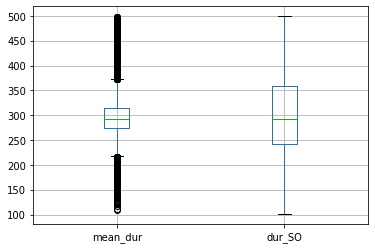

In [67]:
data_train.iloc[:,[2,4]].boxplot()


Boxplots of overall sleep time measurements:

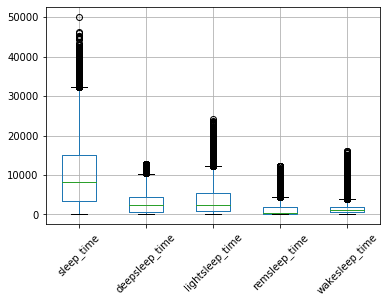

In [69]:
data_train.iloc[:,6:11].boxplot(rot = 45)

Line plot of the 1250 EEG features, for the first row.

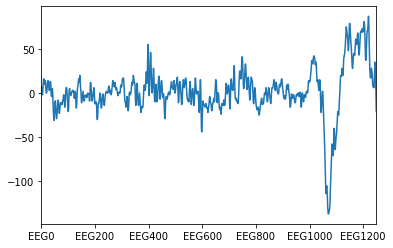

In [10]:
data_train.iloc[0,11:].plot.line()

**y_train** (labels)

In [22]:
y_train.shape

(209307,)

In [18]:
unique, counts = np.unique(y_train, return_counts=True)

In [19]:
dict(zip(unique, counts))

{0: 91472, 1: 62766, 2: 55069}

## Workflow

The workflow should consist of two steps:

1. feature extractor - it receives the full `data_train` pandas dataframe and should output an array-like structure representing the features extracted. 
2. classifier - this should implement a scikit-learn like classifier, that fits the model (using data output by the feature extractor) and predict on new (feature extracted) data. The prediction should be a label in {0, 1, 2} for each sample.

The submission should consist of two files: `feature_extractor.py` and `classifier.py`

## Simple Starting kit

### Feature extractor

This simple feature extractor includes:

* the first 11 columns (which provide information about previous slow oscillations, the current oscillation and sleep duration details)
* the maximum EEG signal
* the minimum EEG signal
* the mean EEG signal

The feature extractor should be in a file named `feature_extractor.py` and placed in a folder named `submissions`.

In [60]:
class FeatureExtractor():
    def __init__(self):
        pass

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):

        features = pd.DataFrame(X_df.iloc[:, :11])
        features['Max'] = X_df.iloc[:,11:].max(axis = 1)
        features['Min'] = X_df.iloc[:,11:].min(axis = 1)
        features['Mean'] = X_df.iloc[:,11:].mean(axis = 1)

        return features

### Classifer

A random forest classifier is used with `n_estimators` (number of trees) equal to 10.

The classifier should be in a file named `classifier.py` and placed in a folder named `submissions` (with the `feature_extractor.py` file)

In [61]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = RandomForestClassifier(n_estimators=10)

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)


## Evaluation

The model will be evaluated using a cross-validation approach (8-fold cross validation). 

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from problem import get_cv

def evaluation(X, y):
    pipe = make_pipeline(FeatureExtractor(), Classifier())
    cv = get_cv(X, y)
    results = cross_validate(pipe, X, y, scoring=['accuracy'], cv=cv,
                             verbose=1, return_train_score=True,
                             n_jobs=1)
    
    return results

You can test your results locally using the `evaluation()` function:

In [62]:
results = evaluation(data_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   44.4s finished


In [63]:
print("Training score Accuracy: {:.3f} +- {:.3f}".format(np.mean(results['train_accuracy']),
                                                        np.std(results['train_accuracy'])))
print("Validation score Accuracy: {:.3f} +- {:.3f} \n".format(np.mean(results['test_accuracy']),
                                                          np.std(results['test_accuracy'])))

Training score Accuracy: 0.982 +- 0.000
Validation score Accuracy: 0.468 +- 0.002 



**to do** 

- another example FE and classifier? 
- suggestions as to directions to investigate 

(talk to Alex)

## Submitting to the online challenge: [ramp.studio](http://ramp.studio)

### Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit).

First install ramp-workflow with `pip install ramp-workflow` **(does this work??)** or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). 

Make sure that the python files `feature_extractor.py`, `regressor.py` (the version you wish to test) are in the [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit) folder, and the data `x_test.h5`, `x_train.h5`, `y_test.h5` and `y_train.h5` are in [`data`](http://localhost:8888/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

### Online submission

Once you found a good model, you can submit them to [ramp.studio](http://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login). Then sign up to the event **ramp-event ??**. Sign up for the event. Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your **sandbox ??** and copy-paste. You can also create a new starting-kit in the `submissions` folder containing both `feature_extractor.py` and `classifier.py` and upload these files directly. You can check the starting-kit ([`feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py) and [`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in a similar way as `ramp_test_submission` does locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions]**add link ??**. Once it is trained, you get a mail, and your submission shows up on the [public leaderboard]**add link ??**.

If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in [my submissions]**add link**. You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation scores 

The official score in this RAMP (the first score column after "historical contributivity" on the [leaderboard]**add link ??**) is Accuracy. When the score is good enough, you can submit it at the RAMP.

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

## Questions

Questions related to the starting kit should be asked on the [issue tracker](https://github.com/ramp-kits/autism/issues). The RAMP site administrators can be pinged at the [RAMP slack team](https://ramp-studio.slack.com/shared_invite/MTg1NDUxNDAyNDk2LTE0OTUzOTcwMDQtMThlOWY1NWU0Mg) in the **??** channel.